In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [10]:
toyota=pd.read_csv("C:\\Users\\Lenovo\\Toyota.csv",encoding='unicode_escape')
toyota.head()


,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [11]:
toy=toyota[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [12]:
toy

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [13]:
toy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [14]:
toy.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [15]:
toy.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


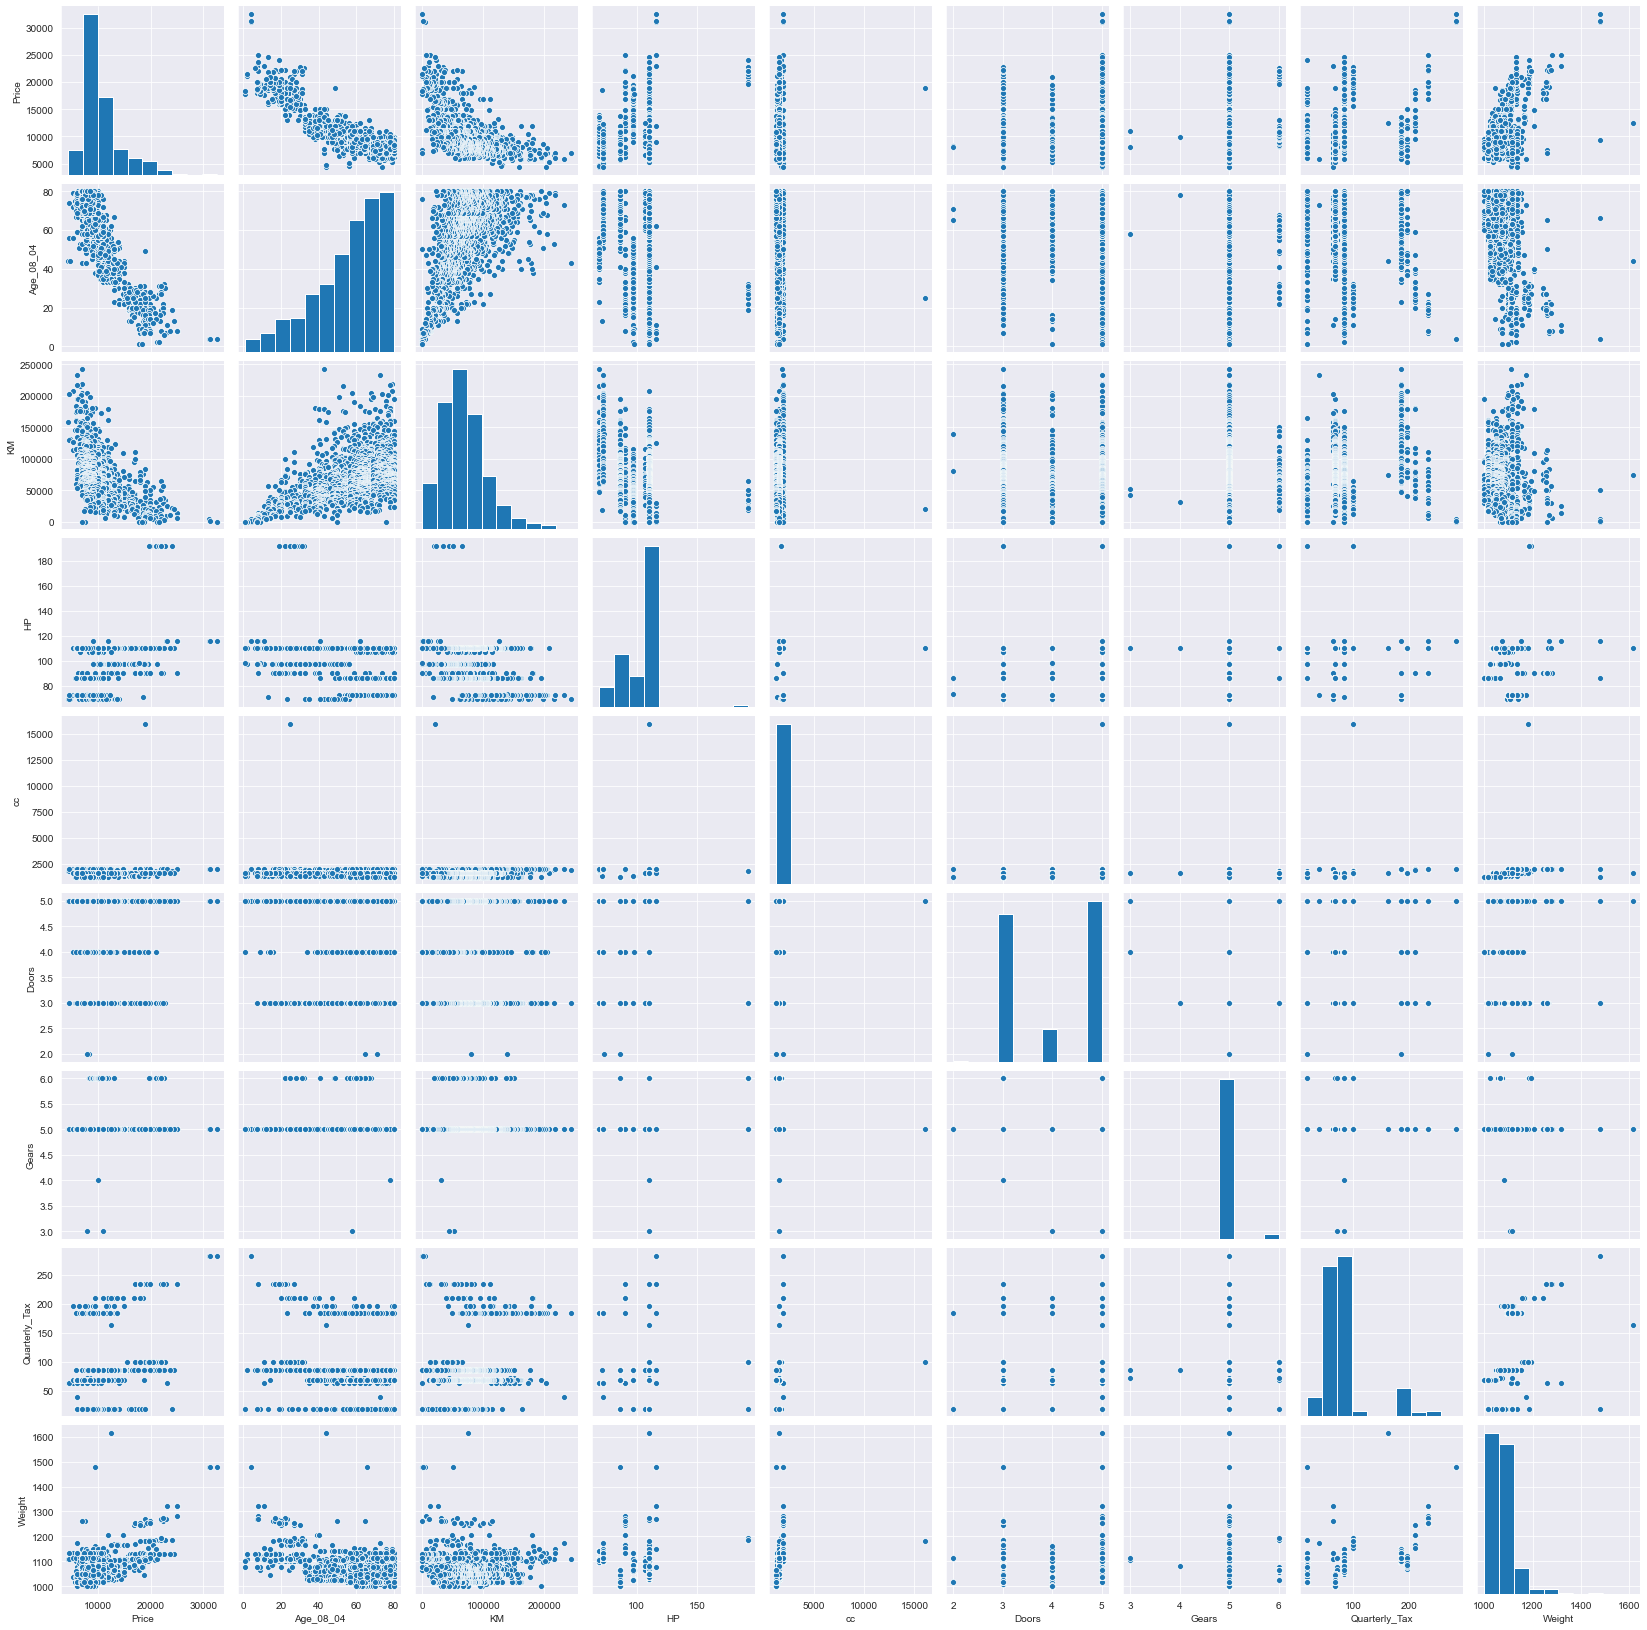

In [16]:
sns.set_style(style='darkgrid')
sns.pairplot(toy)

In [19]:
p=pd.DataFrame(toy['Price'])
a=pd.DataFrame(toy['Age_08_04'])
k=pd.DataFrame(toy['KM'])
h=pd.DataFrame(toy['HP'])
c=pd.DataFrame(toy['cc'])
d=pd.DataFrame(toy['Doors'])
g=pd.DataFrame(toy['Gears'])
q=pd.DataFrame(toy['Quarterly_Tax'])
w=pd.DataFrame(toy['Weight'])

In [20]:
import statsmodels.formula.api as smf 
model = smf.ols('p~a+k+h+c+d+g+q+w',data=toy).fit()

In [21]:
model.params

Intercept   -5573.106358
a            -121.658402
k              -0.020817
h              31.680906
c              -0.121100
d              -1.616641
g             594.319936
q               3.949081
w              16.958632
dtype: float64

In [22]:
print(model.tvalues, '\n', model.pvalues)

Intercept    -3.948666
a           -46.511852
k           -16.621622
h            11.241018
c            -1.344222
d            -0.040410
g             3.016007
q             3.014535
w            15.879803
dtype: float64 
 Intercept     8.241949e-05
a            3.354724e-288
k             7.538439e-57
h             3.757218e-28
c             1.790902e-01
d             9.677716e-01
g             2.606549e-03
q             2.619148e-03
w             2.048576e-52
dtype: float64


In [23]:
(model.rsquared,model.rsquared_adj)

(0.8637627463428192, 0.8629989775766963)

In [24]:
ml_c=smf.ols('p~c',data = toy).fit()  
#t and p-Values
print(ml_c.tvalues, '\n', ml_c.pvalues)  

Intercept    24.694090
c             4.824822
dtype: float64 
 Intercept    1.766912e-112
c             1.550808e-06
dtype: float64


In [25]:
ml_d=smf.ols('p~d',data = toy).fit()  
#t and p-Values
print(ml_d.tvalues, '\n', ml_d.pvalues)  

Intercept    19.258097
d             7.141657
dtype: float64 
 Intercept    1.094732e-73
d            1.461237e-12
dtype: float64


In [26]:
ml_cd=smf.ols('p~c+d',data = toy).fit()  
#t and p-Values
print(ml_cd.tvalues, '\n', ml_cd.pvalues)  

Intercept    12.620704
c             4.340400
d             6.816153
dtype: float64 
 Intercept    1.056885e-34
c            1.521992e-05
d            1.373469e-11
dtype: float64


In [28]:
rsq_a = smf.ols('a~k+h+c+d+g+q+w',data=toy).fit().rsquared  
vif_a = 1/(1-rsq_a)
rsq_k = smf.ols('k~a+h+c+d+g+q+w',data=toy).fit().rsquared  
vif_k = 1/(1-rsq_k)
rsq_h = smf.ols('h~a+k+c+d+g+q+w',data=toy).fit().rsquared  
vif_h = 1/(1-rsq_h)
rsq_c = smf.ols('c~a+k+h+d+g+q+w',data=toy).fit().rsquared  
vif_c = 1/(1-rsq_c)
rsq_d = smf.ols('d~a+k+h+c+g+q+w',data=toy).fit().rsquared  
vif_d = 1/(1-rsq_d)
rsq_g = smf.ols('g~a+k+h+c+d+q+w',data=toy).fit().rsquared  
vif_g = 1/(1-rsq_g)
rsq_q = smf.ols('q~a+k+h+c+d+g+w',data=toy).fit().rsquared  
vif_q = 1/(1-rsq_q)
rsq_w = smf.ols('w~a+k+h+c+d+g+q',data=toy).fit().rsquared  
vif_w = 1/(1-rsq_w)

d1 = {'Variables':['a','k','h','c','d','g','q','w'],'VIF':[vif_a,vif_k,vif_h,vif_c,vif_d,vif_g,vif_q,vif_w]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame


,Variables,VIF
0,a,1.884620
1,k,1.756905
2,h,1.419422
3,c,1.163894
4,d,1.156575
5,g,1.098723
6,q,2.311431
7,w,2.516420


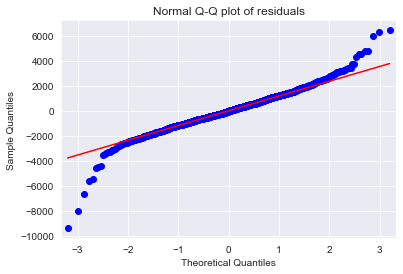

In [29]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [30]:
list(np.where(model.resid<-6000))

[array([221, 601, 960], dtype=int64)]

In [31]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

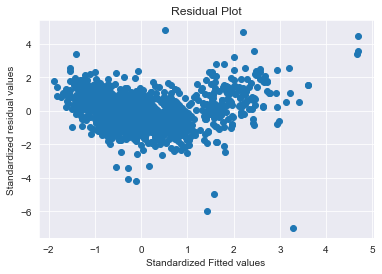

In [32]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

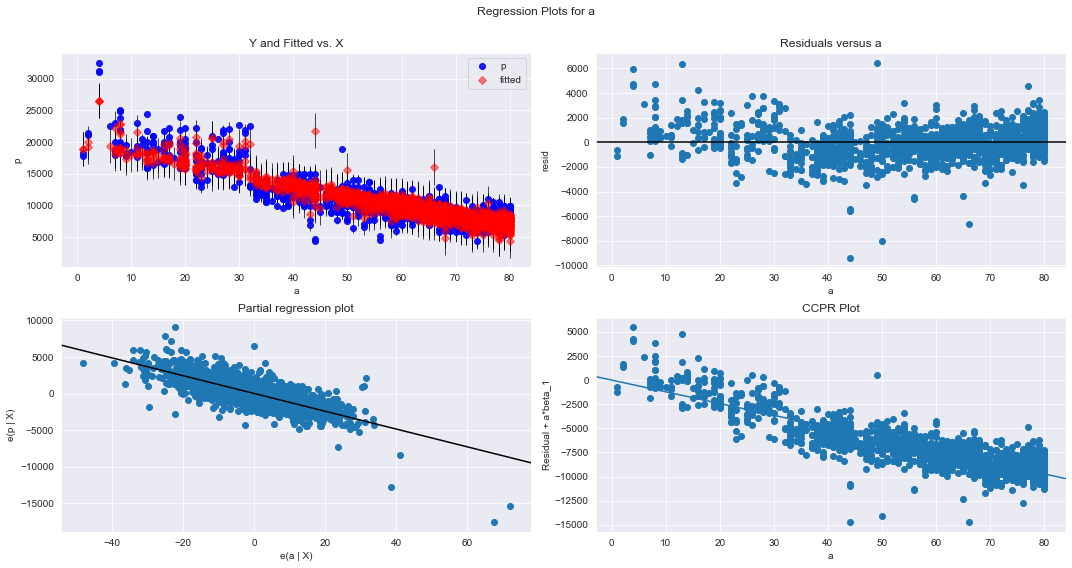

In [33]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "a", fig=fig)
plt.show()

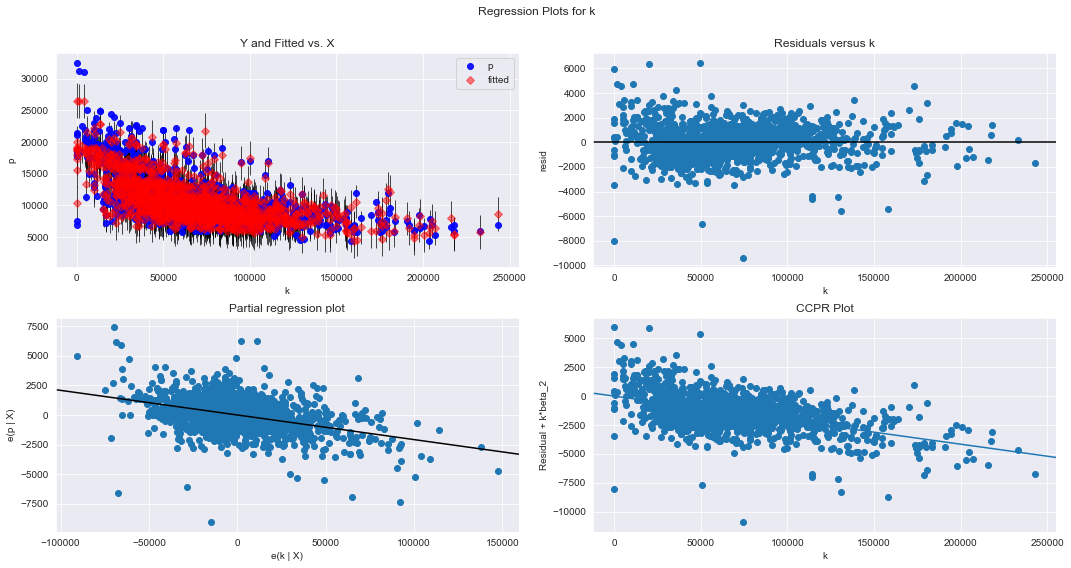

In [34]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "k", fig=fig)
plt.show()

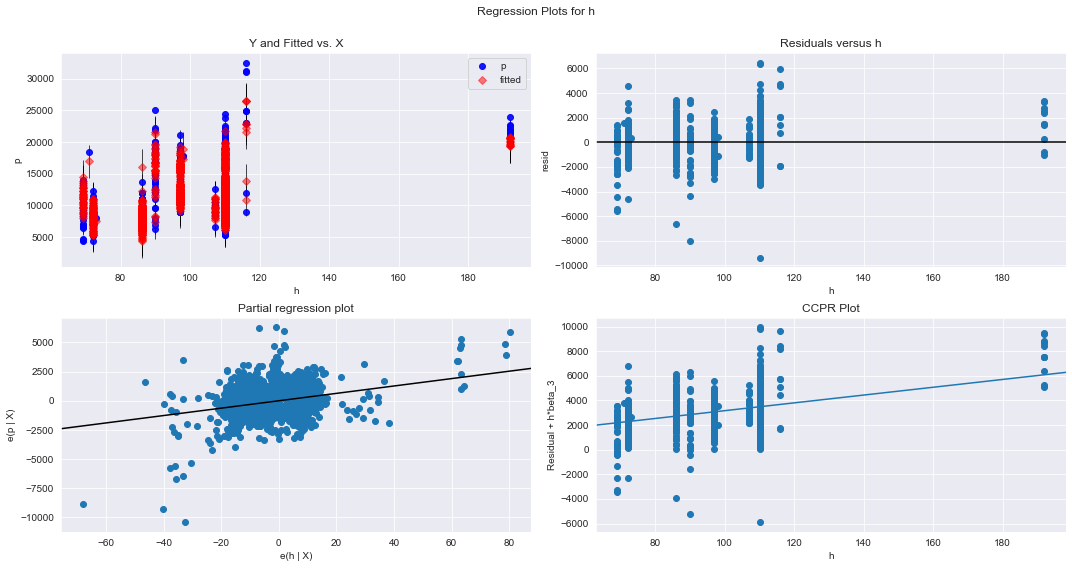

In [35]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "h", fig=fig)
plt.show()

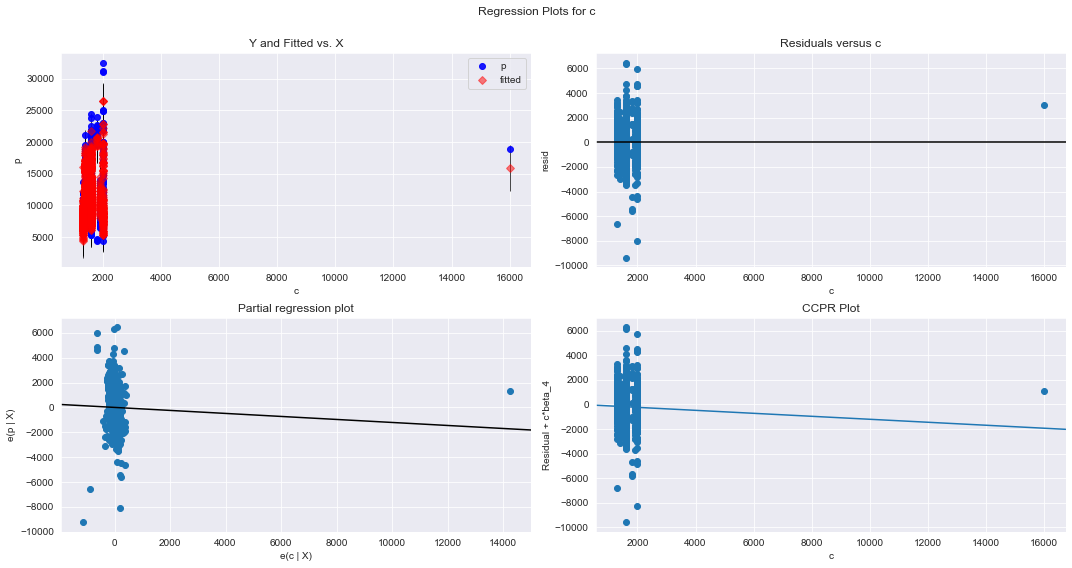

In [36]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "c", fig=fig)
plt.show()

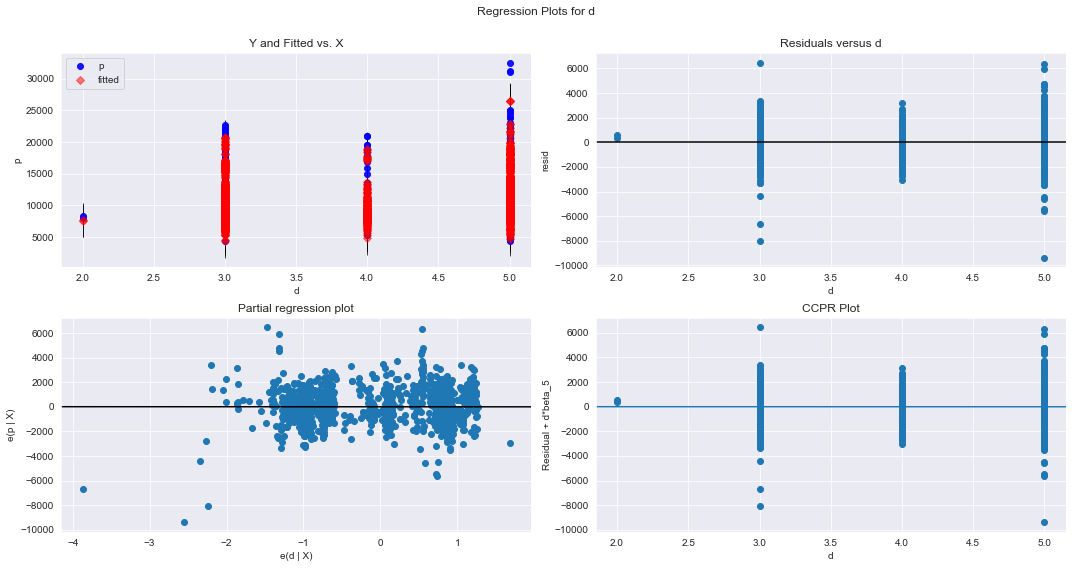

In [37]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "d", fig=fig)
plt.show()

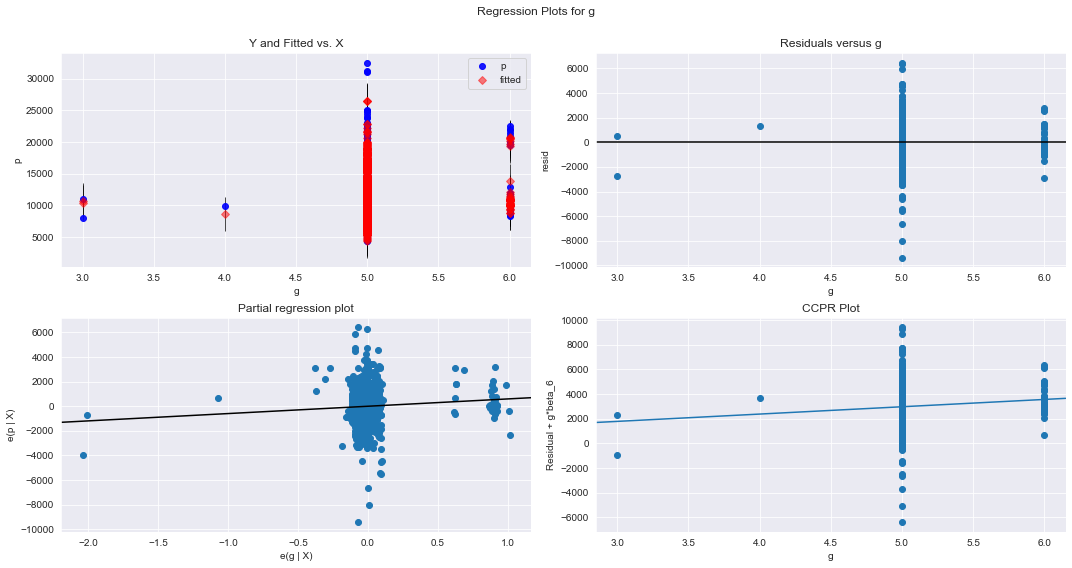

In [38]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "g", fig=fig)
plt.show()

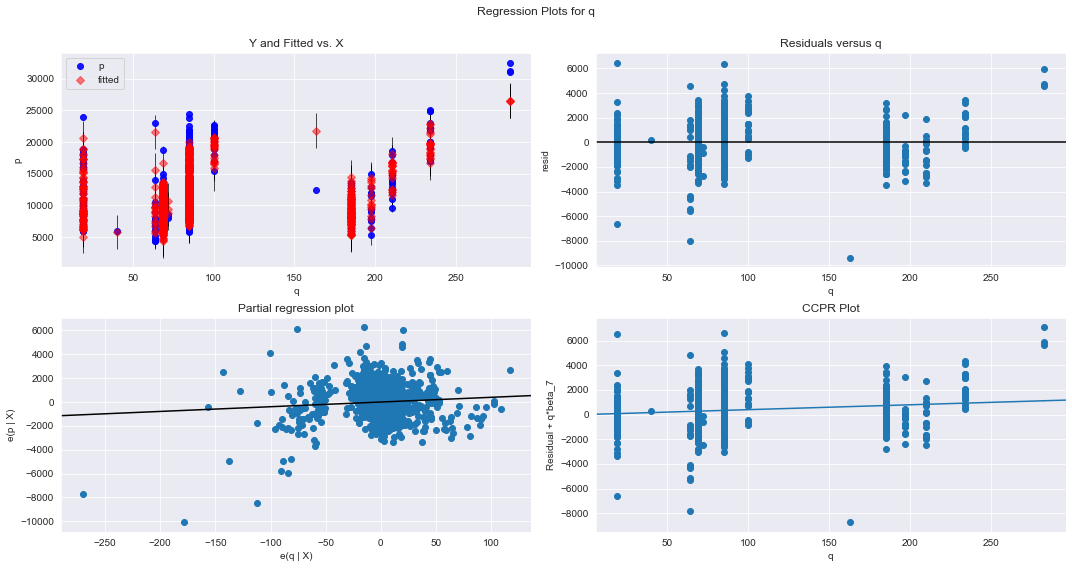

In [39]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "q", fig=fig)
plt.show()

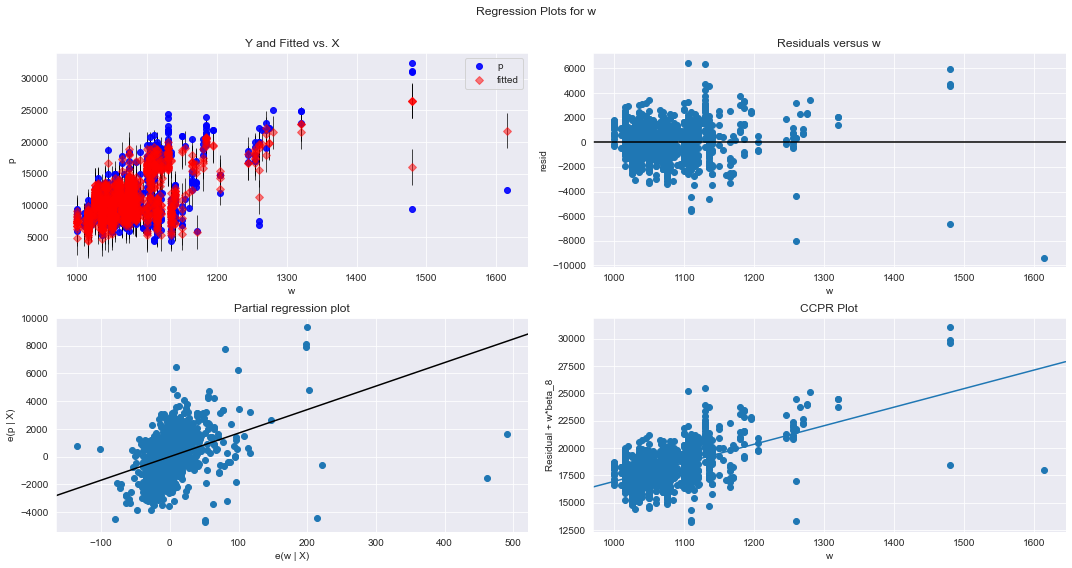

In [40]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "w", fig=fig)
plt.show()

In [41]:
model_influence = model.get_influence()
(c,_ ) = model_influence.cooks_distance
c

array([7.23682667e-03, 3.96793393e-03, 5.46476784e-03, ...,
       8.44762355e-07, 6.97878368e-04, 1.08627724e-02])

<ipython-input-42-cffa675cfd32>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(toy)), np.round(c, 3))


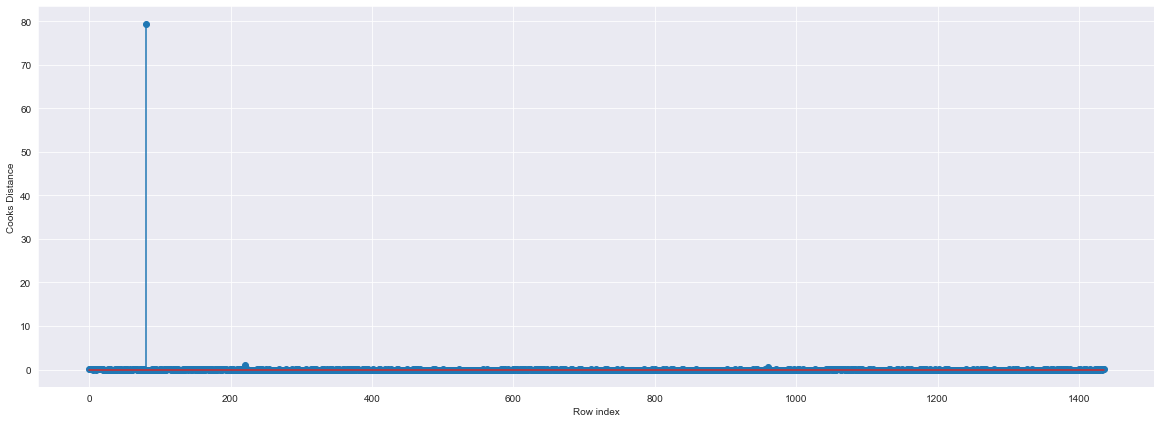

In [42]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toy)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [43]:
(np.argmax(c),np.max(c))

(80, 79.52010624143546)

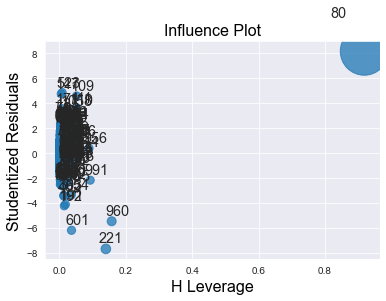

In [44]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [45]:
k = toy.shape[1]
n = toy.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [46]:
leverage_cutoff

0.020891364902506964

In [48]:
toy[toy.index.isin([80])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [85]:
tnew=toy

In [86]:
tnew

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [87]:
toy1=tnew.drop(tnew.index[[80]],axis=0).reset_index()

In [88]:
toy1

,index,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,86,1300,3,5,69,1025
1431,1432,10845,72,19000,86,1300,3,5,69,1015
1432,1433,8500,71,17016,86,1300,3,5,69,1015
1433,1434,7250,70,16916,86,1300,3,5,69,1015


In [89]:
toy1=toy1.drop(['index'],axis=1)

In [90]:
toy1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [91]:
p1=pd.DataFrame(toy1['Price'])
a1=pd.DataFrame(toy1['Age_08_04'])
k1=pd.DataFrame(toy1['KM'])
h1=pd.DataFrame(toy1['HP'])
c1=pd.DataFrame(toy1['cc'])
d1=pd.DataFrame(toy1['Doors'])
g1=pd.DataFrame(toy1['Gears'])
q1=pd.DataFrame(toy1['Quarterly_Tax'])
w1=pd.DataFrame(toy1['Weight'])

In [92]:
final_ml_c1= smf.ols('p1~a1+k1+h1+c1+g1+q1+w1',data = toy1).fit()

In [93]:
(final_ml_c1.rsquared,final_ml_c1.aic)

(0.8693349475698541, 24685.765438793034)

In [94]:
final_ml_d1= smf.ols('p1~a1+k1+h1+d1+g1+q1+w1',data = toy1).fit()

In [95]:
(final_ml_d1.rsquared,final_ml_d1.aic)

(0.8631959819380927, 24751.649416173997)

In [ ]:
#Comparing above R-Square and AIC values, model 'final_ml_c1' has high R- square and low AIC value

In [97]:
model_influence_c1 = final_ml_c1.get_influence()
(c_V, _) = model_influence_c1.cooks_distance

<ipython-input-98-f90250fb6a6a>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(toy1)),np.round(c_V,3));


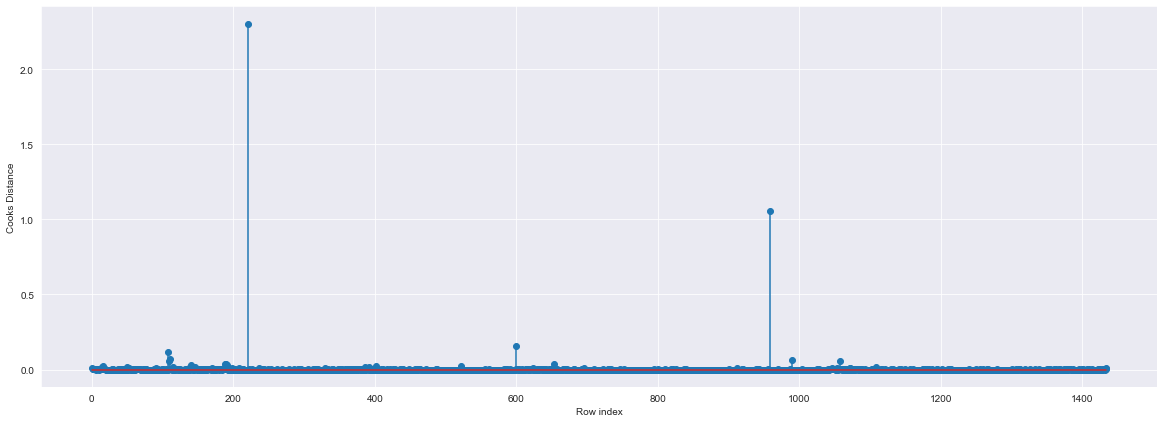

In [98]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toy1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [99]:
(np.argmax(c_V),np.max(c_V))

(220, 2.3034451664520206)

In [100]:
toy2=toy1.drop(toy1.index[[220]],axis=0)

In [101]:
toy3=toy2.reset_index()

In [102]:
toy4=toy3.drop(['index'],axis=1)

In [103]:
p4=pd.DataFrame(toy4['Price'])
a4=pd.DataFrame(toy4['Age_08_04'])
k4=pd.DataFrame(toy4['KM'])
h4=pd.DataFrame(toy4['HP'])
c4=pd.DataFrame(toy4['cc'])
d4=pd.DataFrame(toy4['Doors'])
g4=pd.DataFrame(toy4['Gears'])
q4=pd.DataFrame(toy4['Quarterly_Tax'])
w4=pd.DataFrame(toy4['Weight'])

In [104]:
final_ml_c4= smf.ols('p4~a4+k4+h4+c4+g4+q4+w4',data = toy4).fit()

In [105]:
model_influence_c4 = final_ml_c4.get_influence()
(c_V, _) = model_influence_c4.cooks_distance

<ipython-input-106-22f7c2f2ccd4>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(toy4)),np.round(c_V,3));


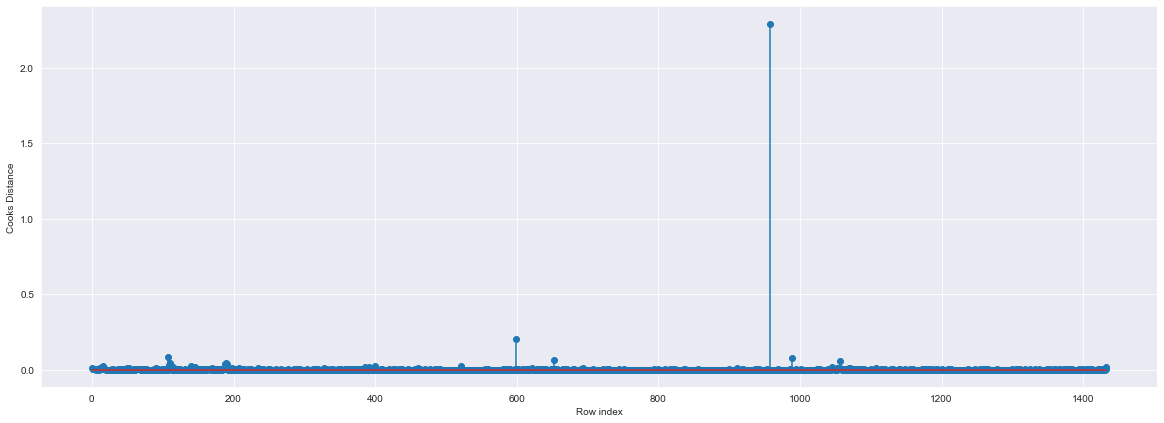

In [106]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toy4)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [107]:
(np.argmax(c_V),np.max(c_V))

(958, 2.290715916303283)

In [108]:
toy5=toy4.drop(toy4.index[[958]],axis=0)

In [109]:
toy6=toy5.reset_index()

In [110]:
toy7=toy6.drop(['index'],axis=1)

In [111]:
p7=pd.DataFrame(toy7['Price'])
a7=pd.DataFrame(toy7['Age_08_04'])
k7=pd.DataFrame(toy7['KM'])
h7=pd.DataFrame(toy7['HP'])
c7=pd.DataFrame(toy7['cc'])
d7=pd.DataFrame(toy7['Doors'])
g7=pd.DataFrame(toy7['Gears'])
q7=pd.DataFrame(toy7['Quarterly_Tax'])
w7=pd.DataFrame(toy7['Weight'])

In [112]:
final_ml_c7= smf.ols('p7~a7+k7+h7+c7+g7+q7+w7',data = toy7).fit()

In [113]:
model_influence_c7 = final_ml_c7.get_influence()
(c_V, _) = model_influence_c7.cooks_distance

<ipython-input-114-cabf84555f87>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(toy7)),np.round(c_V,3));


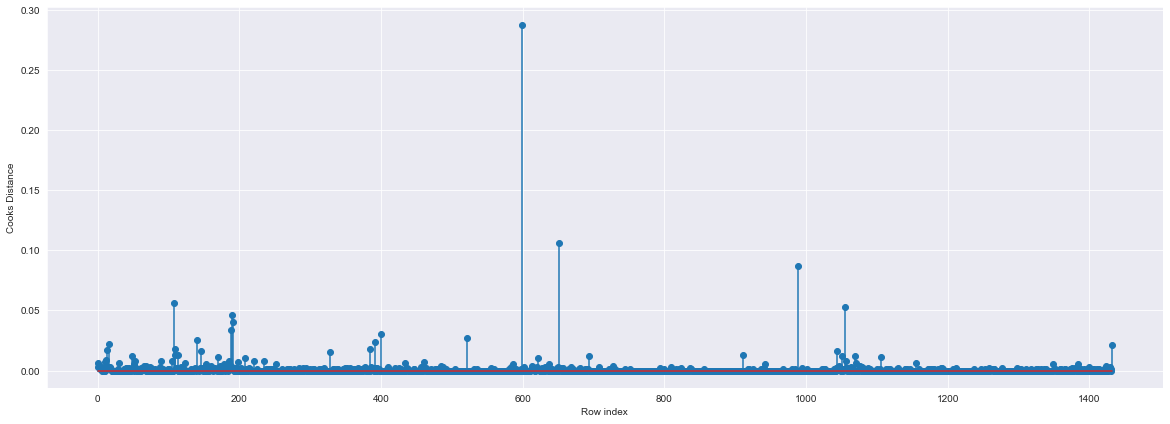

In [114]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toy7)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [115]:
(np.argmax(c_V),np.max(c_V))

(599, 0.2877229363895564)

In [116]:
final_ml_c7= smf.ols('p7~a7+k7+h7+c7+g7+q7+w7',data = toy7).fit()

In [117]:
(final_ml_c7.rsquared,final_ml_c7.aic)

(0.8843226794628847, 24478.432455892536)

In [120]:
#New data for prediction
new_data=pd.DataFrame({'a7':20,"k7":46000,"h7":90,"c7":2000,"g7":5,"q7":69,"w7":1170},index=[1])

In [121]:
new_data

,a7,k7,h7,c7,g7,q7,w7
1,20,46000,90,2000,5,69,1170


In [122]:
final_ml_c7.predict(new_data)

1    15919.268222
dtype: float64